In [1]:
!nvidia-smi

Wed Jan 21 11:05:25 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   38C    P8              3W /   55W |     644MiB /   8188MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
root = "/home/vector/master_dataset"

In [ ]:
import os

class_counts = {}
for cls in sorted(os.listdir(root)):
    path = os.path.join(root, cls)
    if os.path.isdir(path):
        class_counts[cls] = len(os.listdir(path))

print(class_counts)

{'e_waste': 2406, 'glass': 3566, 'medical': 4392, 'metal': 8002, 'organic': 4244, 'paper_cardboard': 8986, 'plastic': 9406, 'textile': 892}


In [6]:
from PIL import Image
import numpy as np

sizes = []
channels = set()

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        p = os.path.join(root, cls, img)
        try:
            im = Image.open(p)
            sizes.append(im.size)      # (W, H)
            channels.add(im.mode)      # RGB, L, etc
        except:
            print("Corrupt:", p)

print("Unique sizes (sample):", set(sizes))
print("Image modes:", channels)


Corrupt: /home/vector/master_dataset/e_waste/e_waste_643.jpg
Corrupt: /home/vector/master_dataset/paper_cardboard/paper_cardboard_2028.jpg
Corrupt: /home/vector/master_dataset/paper_cardboard/paper_cardboard_5025.jpg
Unique sizes (sample): {(473, 332), (3088, 1732), (920, 1021), (5479, 3653), (500, 435), (474, 1200), (720, 438), (1300, 784), (959, 720), (1200, 1600), (150, 93), (1024, 849), (274, 388), (480, 722), (1865, 1465), (282, 212), (576, 430), (650, 379), (600, 787), (400, 204), (345, 268), (773, 715), (5076, 3384), (1200, 553), (1600, 1167), (308, 386), (454, 440), (500, 556), (285, 402), (500, 327), (1300, 905), (329, 445), (637, 561), (494, 741), (480, 843), (900, 1200), (1024, 741), (750, 438), (650, 500), (530, 435), (1500, 670), (584, 671), (1200, 674), (330, 266), (275, 330), (679, 679), (660, 437), (500, 448), (1300, 1026), (398, 400), (150, 335), (475, 620), (1024, 862), (623, 518), (425, 274), (263, 212), (750, 559), (2035, 2118), (650, 392), (600, 800), (474, 395), (

In [7]:
ratios = [w/h for w, h in sizes]
print("Min ratio:", min(ratios))
print("Max ratio:", max(ratios))

Min ratio: 0.10063965884861407
Max ratio: 6.4


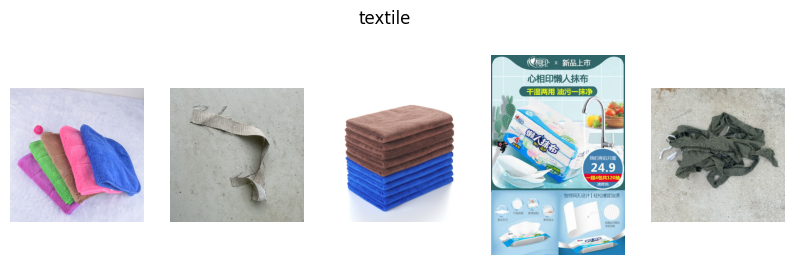

In [8]:
import matplotlib.pyplot as plt
import random

cls = random.choice(list(class_counts.keys()))
imgs = random.sample(os.listdir(os.path.join(root, cls)), 5)

plt.figure(figsize=(10,3))
for i, img in enumerate(imgs):
    plt.subplot(1,5,i+1)
    plt.imshow(Image.open(os.path.join(root, cls, img)))
    plt.axis("off")
plt.suptitle(cls)
plt.show()


In [9]:
import hashlib

hashes = {}
dups = []

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        p = os.path.join(root, cls, img)
        h = hashlib.md5(open(p,'rb').read()).hexdigest()
        if h in hashes:
            dups.append((p, hashes[h]))
        else:
            hashes[h] = p

print("Duplicate pairs:", len(dups))


Duplicate pairs: 2018


In [1]:
import os, hashlib
from collections import defaultdict

root = "/home/vector/master_dataset"

hash_map = defaultdict(list)

for cls in os.listdir(root):
    cls_path = os.path.join(root, cls)
    if not os.path.isdir(cls_path):
        continue

    for img in os.listdir(cls_path):
        path = os.path.join(cls_path, img)
        try:
            with open(path, "rb") as f:
                h = hashlib.md5(f.read()).hexdigest()
            hash_map[h].append(path)
        except:
            pass

with open("check.txt", "w") as f:
    for paths in hash_map.values():
        if len(paths) > 1:
            count = 0
            for p in paths: 
                if(count==0):
                    count+=1
                    continue
                f.write(p + "\n")
            count = 0
            f.write("\n")   # separator between groups

print("Duplicate groups written to duplicates.txt")


Duplicate groups written to duplicates.txt


In [2]:
from PIL import Image
from collections import Counter
import os

modes = Counter()

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        try:
            im = Image.open(os.path.join(root, cls, img))
            modes[im.mode] += 1
        except:
            pass

print(modes)


/home/vector/anaconda3/envs/gpu/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Counter({'RGB': 39166, 'RGBA': 503, 'P': 131, 'L': 59, 'CMYK': 14})


In [3]:
import numpy as np
from PIL import Image

w, h = [], []

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        try:
            im = Image.open(os.path.join(root, cls, img))
            W, H = im.size
            w.append(W)
            h.append(H)
        except:
            pass

print("Width  :", np.percentile(w, [5, 25, 50, 75, 95]))
print("Height :", np.percentile(h, [5, 25, 50, 75, 95]))


/home/vector/anaconda3/envs/gpu/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Width  : [ 220.  390.  524.  745. 1440.]
Height : [ 194.  340.  500.  641. 1280.]


In [4]:
ratios = [W/H for W, H in zip(w, h)]
print("Aspect ratio:", np.percentile(ratios, [1, 5, 50, 95, 99]))


Aspect ratio: [0.5624297  0.66833176 1.         1.7699115  2.10567711]


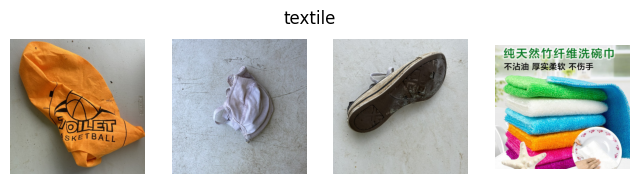

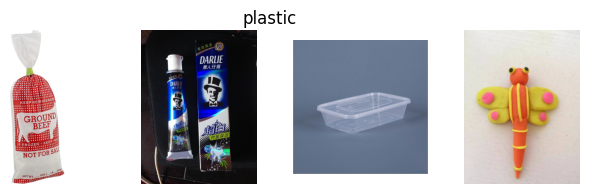

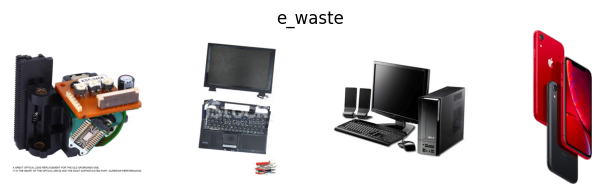

In [5]:
import matplotlib.pyplot as plt
import random

for cls in random.sample(os.listdir(root), 3):
    imgs = random.sample(os.listdir(os.path.join(root, cls)), 4)
    plt.figure(figsize=(8,2))
    for i, img in enumerate(imgs):
        plt.subplot(1,4,i+1)
        plt.imshow(Image.open(os.path.join(root, cls, img)))
        plt.axis("off")
    plt.suptitle(cls)
    plt.show()


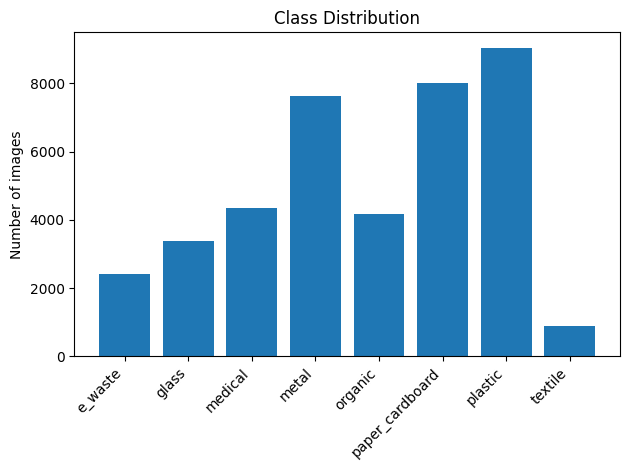

In [6]:
import os
import matplotlib.pyplot as plt

root = "/home/vector/master_dataset"

classes = []
counts = []

for cls in sorted(os.listdir(root)):
    p = os.path.join(root, cls)
    if os.path.isdir(p):
        classes.append(cls)
        counts.append(len(os.listdir(p)))

plt.figure()
plt.bar(classes, counts)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


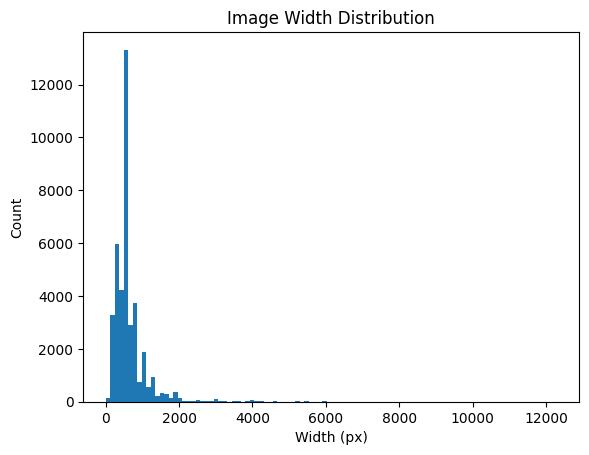

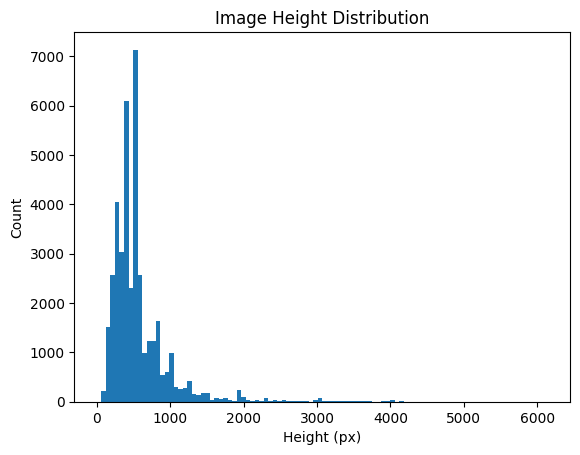

In [12]:
from PIL import Image
import numpy as np

widths, heights = [], []

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        try:
            w, h = Image.open(os.path.join(root, cls, img)).size
            widths.append(w)
            heights.append(h)
        except:
            pass

plt.figure()
plt.hist(widths, bins=100)
plt.title("Image Width Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(heights, bins=100)
plt.title("Image Height Distribution")
plt.xlabel("Height (px)")
plt.ylabel("Count")
plt.show()


In [8]:
import numpy as np
from PIL import Image

w, h = [], []

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        try:
            im = Image.open(os.path.join(root, cls, img))
            W, H = im.size
            w.append(W)
            h.append(H)
        except:
            pass

print("Width  :", np.percentile(w, [5, 25, 50, 75, 95]))
print("Height :", np.percentile(h, [5, 25, 50, 75, 95]))


Width  : [ 220.  390.  524.  745. 1440.]
Height : [ 194.  340.  500.  641. 1280.]


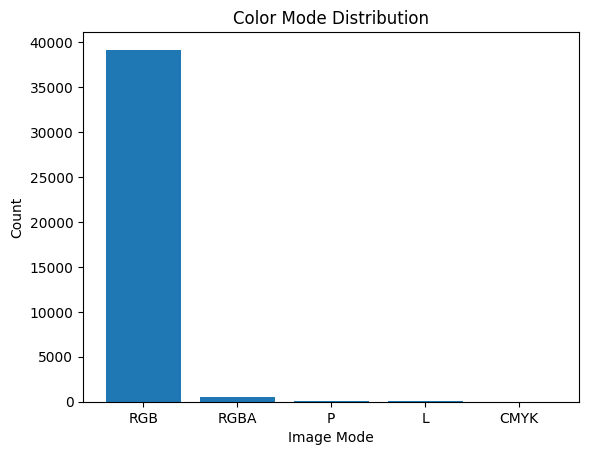

In [9]:
from collections import Counter

modes = Counter()

for cls in os.listdir(root):
    for img in os.listdir(os.path.join(root, cls)):
        try:
            modes[Image.open(os.path.join(root, cls, img)).mode] += 1
        except:
            pass

plt.figure()
plt.bar(modes.keys(), modes.values())
plt.xlabel("Image Mode")
plt.ylabel("Count")
plt.title("Color Mode Distribution")
plt.show()


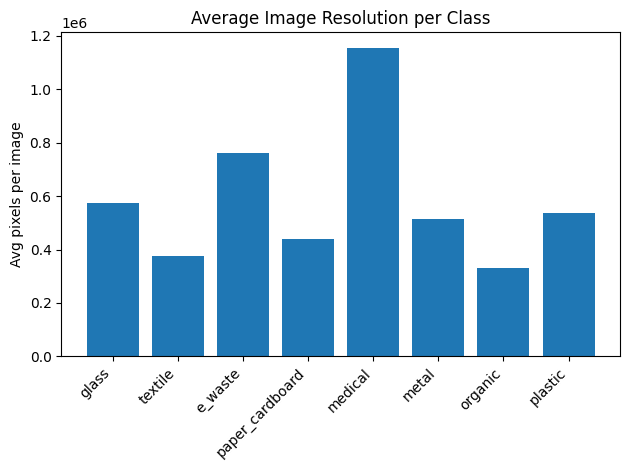

In [10]:
import numpy as np

avg_pixels = {}

for cls in os.listdir(root):
    pixels = []
    for img in os.listdir(os.path.join(root, cls)):
        try:
            w, h = Image.open(os.path.join(root, cls, img)).size
            pixels.append(w * h)
        except:
            pass
    avg_pixels[cls] = np.mean(pixels)

plt.figure()
plt.bar(avg_pixels.keys(), avg_pixels.values())
plt.xticks(rotation=45, ha="right")
plt.ylabel("Avg pixels per image")
plt.title("Average Image Resolution per Class")
plt.tight_layout()
plt.show()
